<a href="https://colab.research.google.com/github/chrisjulio/INFO7017/blob/main/T1_1_Perceptron01_Christiano_Guilherme_Marcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#ff9900"> **Perceptron**</font>
---

O <font color="#66ffff">**Perceptron**</font> de Rosenblatt (1957) foi a primeira *neural network* (NN) descrita com um algoritmo de treinamento, sendo, apesar de suas limitações, a **pedra fundamental das modernas NNs**.

Essencialmente o modelo perceptron é um **classificador linear**. Isto é, o objetivo é encontrar um **"hiperplano"** (uma linha no espaço $2D$, um plano no espaço $3D$ ou outros análogos em espaços superiores) **separando os dados em duas classes**.

Definição
--
Matematicamente um modelo Perceptron pode ser representado como $y = f(w \cdot x + b)$, sendo que $x$ é um vetor de entrada (*input*) formado de valores reais, $w$ é o vetor de pesos (*weights*), $b$ o termo *bias* e f é a função de ativação. O *bias* é independente da entrada e desloca o limite de decisão da sua origem.

A função de ativação $f$ é uma função *threshold* que mapeia as entradas $x$ em um valor de saída que é um valor binário único (1 ou 0), da forma
\begin{align}
        f(x) = \left\{
        \begin{array}{cl}
        1 & if \ w  \cdot x + b \gt 0,  \\
        0 & otherwise
        \end{array}
        \right.
\end{align}

$w \cdot x$ é o produto escalar (*dot product*), isto é, $ \sum_{i=1}^m w_i x_i$, onde $m$ é o número de entradas do perceptron.


Algoritmo de Aprendizado
--
O algoritmo de treinamento do Perceptron (de **uma camada**) foi proposto por Rosenblatt e bastante inspirado na regra Hebb (*Hebbian learning*). Em seu livro *The Organization of Behavior* (1949), Donald Olding Hebb sugeriu que, quando um neurônio biológico dispara outro neurônio, frequentemente a conexão entre esses dois neurônios é fortalecida.

Perceptrons são treinados usando uma variante dessa regra levando em consideração o erro cometido pela rede quando ela faz uma predição. A regra de aprendizado do Perceptron reforça as conexões ajudando a reduzir o erro.

O algoritmo de aprendizado pode ser sumarizado nos seguintes passos:

1. Inicialize os pesos e *bias* com valores aleatórios pequenos.

2. Para cada par entrada-saída $(x, d)$, compute a saída predita $y$ fazendo $f(w \cdot x + b)$.

3. Atualize os pesos e *bias* baseado no erro $e = d - y$ fazendo, $w = w + \eta \cdot e \cdot x $ e $b = b + \eta \cdot e$


Sendo $\eta$ a taxa de aprendizado (*learning rate*), uma pequena constante positiva que controla o incremento (*step size*) das atualizações.

4. Repita os passos 2 e 3 por um número fixo de iterações ou até o erro convergir.

---

> 💡 **Observação**: Para executar a célula de código (aquelas marcadas com ` []`), posicione dentro dela e pressione `Ctrl`+`Enter`. Deve-se respeitar a **sequência** de execução das células.

---

Importação dos Módulos
--

Antes de mais nada vamos importar as bibliotecas necessárias.

A primeira é ``NumPy`` (https://numpy.org/). NumPy é um pacote fundamental para computação científica com Python, sendo uma biblioteca bastante madura otimizada para manipular *arrays* multidimensionais gigantes. Seu desenvolvimento é comunitário e possui licença BSD.

Já ``pandas``  (https://pandas.pydata.org/) utilizaremos brevemente para análise exploratório de dados.

Finalmente vamos importar a biblioteca ``Matplotlib``(https://matplotlib.org/) para auxiliar na visualização de gráficos.

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

# versions
print(f'numpy:{np.__version__}\npandas:{pd.__version__}')

numpy:2.0.2
pandas:2.2.2


Implementação do Perceptron
--

Vamos implementar uma classe `Perceptron` para representar um modelo Perceptron. Inicialmente definimos os atributos constituintes do modelo. Os hiperparâmetros `learning_rate` e `epochs` são usados no algoritmo de treinamento. A taxa de aprendizagem (`learning_rate`) é usada para limitar a quantidade que cada peso é corrigido cada vez que é atualizado. Já iterações ou épocas (`epochs`) indica o número de vezes para executar passando pelos dados de treinamento, enquanto atualiza o peso.

```python
class Perceptron:
    
    def __init__(self, learning_rate=0.1, epochs=100):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
```


Ainda na classe precisamos definir a função de ativação que computa a saída do Perceptron dado uma entrada.

Funções de ativação são uma parte essencial dos Perceptrons e redes neurais porque elas permitem que o modelo aprenda e tome decisões com base nos dados de entrada. Elas também ajudam a introduzir não-linearidade no modelo, o que é necessário para aprender relacionamentos mais complexos nos dados.

Alguns tipos comuns de funções de ativação usados nos Perceptrons são Sign, o Heaviside, Sigmoid, ReLU, etc.


Nesta implementação utilizaremos a função ``heaviside``, que retorna $1$ se a entrada for $ \ge 0$ e $0$ caso contrário.
                

```python
    # heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0) # heaviside(z) heaviside -> activation
```

Na sequência o algoritmo de treinamento. Vamos manter a nomenclatura da ``Scikit-learn``, portanto nossa função será chamada ``fit``.

Esse algoritmo de otimização funciona baseando-se no fato de que cada instância de treinamento é apresentada ao modelo uma de cada vez. O modelo faz uma previsão para uma instância de treinamento, o erro é calculado e o modelo é atualizado para reduzir o erro na próxima previsão. Assim tal procedimento pode ser usado para encontrar o conjunto de pesos em um modelo que resultem no menor erro para o modelo nos dados de treinamento.


```python
    def fit(self, X, y):
    
        n_features = X.shape[1]
        
        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            
            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                
                # Updating weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias
```

Finalmente a predição, no método ``predict``.

```python
    def predict(self, X):

        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
```

Juntando tudo e adicionando a tediosa, mas essencial, ***documentação interna**! 😼

In [ ]:
class Perceptron:
    """
    A Perceptron is a type of artificial neural network that can be used for binary classification problems.

    This class implements a Perceptron model using the heaviside activation function.
    The model can be used for both training and prediction tasks.

    Parameters:
    -----------
    learning_rate : float
        The learning rate controls the step size of the gradient descent algorithm during training. It determines
        how quickly the model learns from the training data. A smaller learning rate may result in slower convergence,
        while a larger learning rate may cause the algorithm to overshoot the minimum of the loss function.

    epochs : int
        The number of epochs specifies how many times the entire training dataset should be passed through the model
        during training. One epoch consists of iterating through all the training examples once. Increasing the number
        of epochs may improve the performance of the model, but also increases the training time.
    """

    def __init__(self, learning_rate=0.1, epochs=100):
        """
        Initialize a new Perceptron instance with the specified learning rate and number of epochs.

        Parameters:
        -----------
        learning_rate : float
            The learning rate controls the step size of the gradient descent algorithm during training.

        epochs : int
            The number of epochs specifies how many times the entire training dataset should be passed through the
            model during training.
        """
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs


    def activation(self, z):
        """
        The activation function computes the output of the Perceptron given its input.

        This implementation uses the heaviside activation function, which returns 1 if the input is greater than or
        equal to zero, and 0 otherwise.

        Parameters:
        -----------
        z : float
            The input to the activation function, which is the dot product of the input features and the model weights
            plus the bias term.

        Returns:
        --------
        float
            The output of the activation function.
        """
        return np.heaviside(z, 0) # heaviside(z) heaviside -> activation


    def fit(self, X, y):
        """
        Train the Perceptron on the provided training data.

        This method updates the model weights and bias term using the specified learning rate and number of epochs,
        until the algorithm converges or the maximum number of epochs is reached.

        Parameters:
        -----------
        X : numpy.ndarray
            A 2D array of shape (n_samples, n_features) containing the input features for each training example.

        y : numpy.ndarray
            A 1D array of shape (n_samples,) containing the target binary class labels for each training example.
            The values should be either 0 or 1.

        Returns:
        --------
        tuple
            A tuple containing the trained weights and bias term of the Perceptron.
        """
        n_features = X.shape[1]

        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0

        # Iterating until the number of epochs
        for epoch in range(self.epochs):

            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function

                #Updating weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred[i])

        return self.weights, self.bias


    def predict(self, X):
        """
        Predicts the binary class label for input data X.

        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            The input data.

        Returns:
        --------
        ndarray, shape (n_samples,)
            The binary class labels predicted by the perceptron.
        """
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

Importação de um *Dataset* e Análise Exploratória
--

``Scikit-learn`` (https://scikit-learn.org/stable/) possui uma série de *datasets built-in* que podem ser usados para testar os modelos de ML, seja com propósitos educacionais ou mesmo de *benchmarking*. Um de tais *datasets* é o Wine, que contém características de vinhos, mostrada a seguir.


## Importação dos Módulos
--

Antes de mais nada, importamos os módulos necessários para o projeto. Em seguida, realizamos a importação do conjunto de dados **Wine Recognition Dataset**, que está disponível diretamente pela biblioteca `sklearn.datasets`.

Este dataset é composto por **178 amostras de vinho**, originárias da região de cultivação italiana, e contém **13 atributos químicos** de cada amostra, como teor de álcool, ácido málico, magnésio, fenóis, flavonoides, entre outros.

As amostras são classificadas em **3 classes**, cada uma representando uma cultivar de uva diferente:

- **Classe 0**: Cultivar 1  
- **Classe 1**: Cultivar 2  
- **Classe 2**: Cultivar 3

O objetivo do modelo será aprender a **classificar corretamente a cultivar da uva** com base nos atributos químicos fornecidos. Trata-se de um problema de **classificação multiclasse supervisionada**.

Utilizaremos esse dataset para treinar um Perceptron simples e avaliar seu desempenho na tarefa de classificação.


In [ ]:
from sklearn import datasets

wine = datasets.load_wine()  # Loading the dataset iris

print(wine.keys())

print('\n')

print(wine['data'][0])
print(wine['target'][0])

print('\n')

print(wine['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
0


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Para realizarmos uma exploração, vamos converter o ``array`` numpy em um ``DataFrame`` Pandas, selecionando alguns campos de interesse.

In [ ]:
wine = pd.DataFrame(
    data= np.c_[wine['data'], wine['target']],
    columns= wine['feature_names'] + ['target']
    )

wine.head(5)  # first 5 instances (rows)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


Como podemos observar, o DataFrame gerado contém 13 atributos químicos numéricos contínuos, como teor de álcool, ácido málico, magnésio, fenóis totais, flavonoides, e intensidade de cor, entre outros. Também há uma coluna target indicando a classe da amostra de vinho, codificada numericamente como: 0, 1 e 2, correspondendo às três diferentes cultivares de uva presentes no conjunto de dados.

Vamos adicionar o nome da classe para fins de visualização posterior.

In [ ]:
classes = []

for i in range(len(wine['target'])):
    if wine['target'][i] == 0:
        classes.append('class_0')
    elif wine['target'][i] == 1:
        classes.append('class_1')
    else:
        classes.append('class_2')


wine['classes'] = classes

Exibindo novamente 5 linhas.

In [ ]:
wine.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,class_0


Obtendo um sumário da distribuição das instâncias.

In [ ]:
wine.groupby('classes').size()

,0
classes,
class_0,59
class_1,71
class_2,48


In [ ]:
wine.describe(include = 'all')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,classes
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class_1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202,NaN
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035,NaN
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,NaN
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,NaN
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000,NaN
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000,NaN


Finalmente vamos plotar o *dataset* para inspecionar visualmente a distribuição das classes.



Preparação do Ambiente
--
Primeiramente configurar o pyplot para apresentar nossas imagens. Vamos definir o tamanho da fonte e das figuras.

In [ ]:
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 4)

plt.style.use('dark_background')  # "dark" theme

E um pretinho básico! 😜


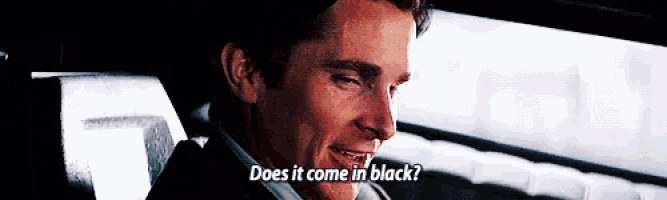

Iniciando com a característica (álcool e ácido málico).

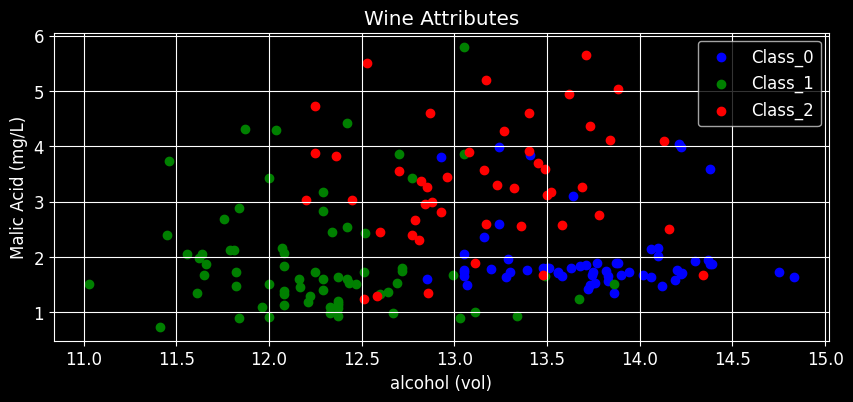

In [ ]:
class_0 = wine[wine.classes == "class_0"]
class_1 = wine[wine.classes == 'class_1']
class_2 = wine[wine.classes == 'class_2']

fig, ax = plt.subplots()

# labels and scatter points
ax.scatter(class_0['alcohol'], class_0['malic_acid'], label="Class_0", facecolor="blue")
ax.scatter(class_1['alcohol'], class_1['malic_acid'], label="Class_1", facecolor="green")
ax.scatter(class_2['alcohol'], class_2['malic_acid'], label="Class_2", facecolor="red")


ax.set_xlabel("alcohol (vol)")
ax.set_ylabel("Malic Acid (mg/L)")
ax.grid()
ax.set_title("Wine Attributes")
ax.legend()

plt.show();

Não parece promissor. Há alguma diferença entre os grupamentos, mas não está muito clara a separação. Além disso, alguns pontos estão completamente inseridos dentro de outro grupamento. Vejamos com álcool e flavonoides...

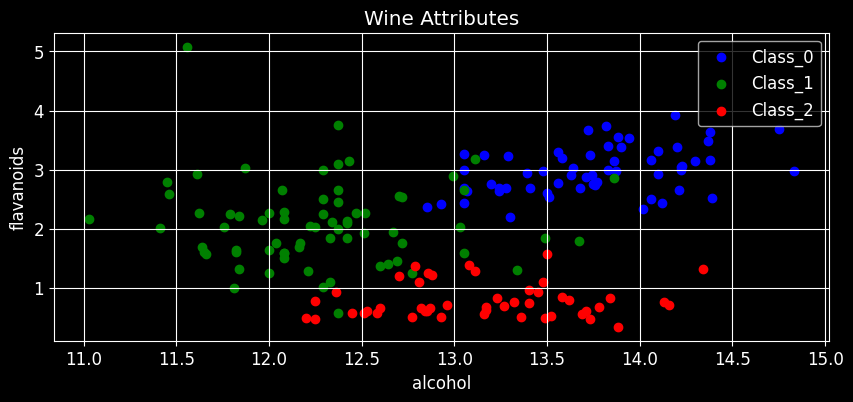

In [ ]:
class_0 = wine[wine.classes == "class_0"]
class_1 = wine[wine.classes == 'class_1']
class_2 = wine[wine.classes == 'class_2']

fig, ax = plt.subplots()

# labels and scatter points
ax.scatter(class_0['alcohol'], class_0['flavanoids'], label="Class_0", facecolor="blue")
ax.scatter(class_1['alcohol'], class_1['flavanoids'], label="Class_1", facecolor="green")
ax.scatter(class_2['alcohol'], class_2['flavanoids'], label="Class_2", facecolor="red")


ax.set_xlabel("alcohol")
ax.set_ylabel("flavanoids")
ax.grid()
ax.set_title("Wine Attributes")
ax.legend()

plt.show();

Não está segmentado o suficiente para podermos estruturar um estudo. Manteremos álcool como um dos parâmetros porque nos parece que é essencial e distintivo entre vinhos. No entanto, a segunda variável precisa ser melhor escolhida.

Aqui teremos que espandir a área de estudo com outra abordagem. A simples implementação baseada em características que aparentemente são distintas, olhando o conjunto de atributos sem nenhuma ferramenta **não está sendo eficiente**.
Com a ajuda do colega **Jefferson Speck**, que tem conhecimento mais profundo desta ferramenta, utilizaremos um **analisador de parâmetros** para ajudar a escolher um conjunto melhor de especificações para estudar.

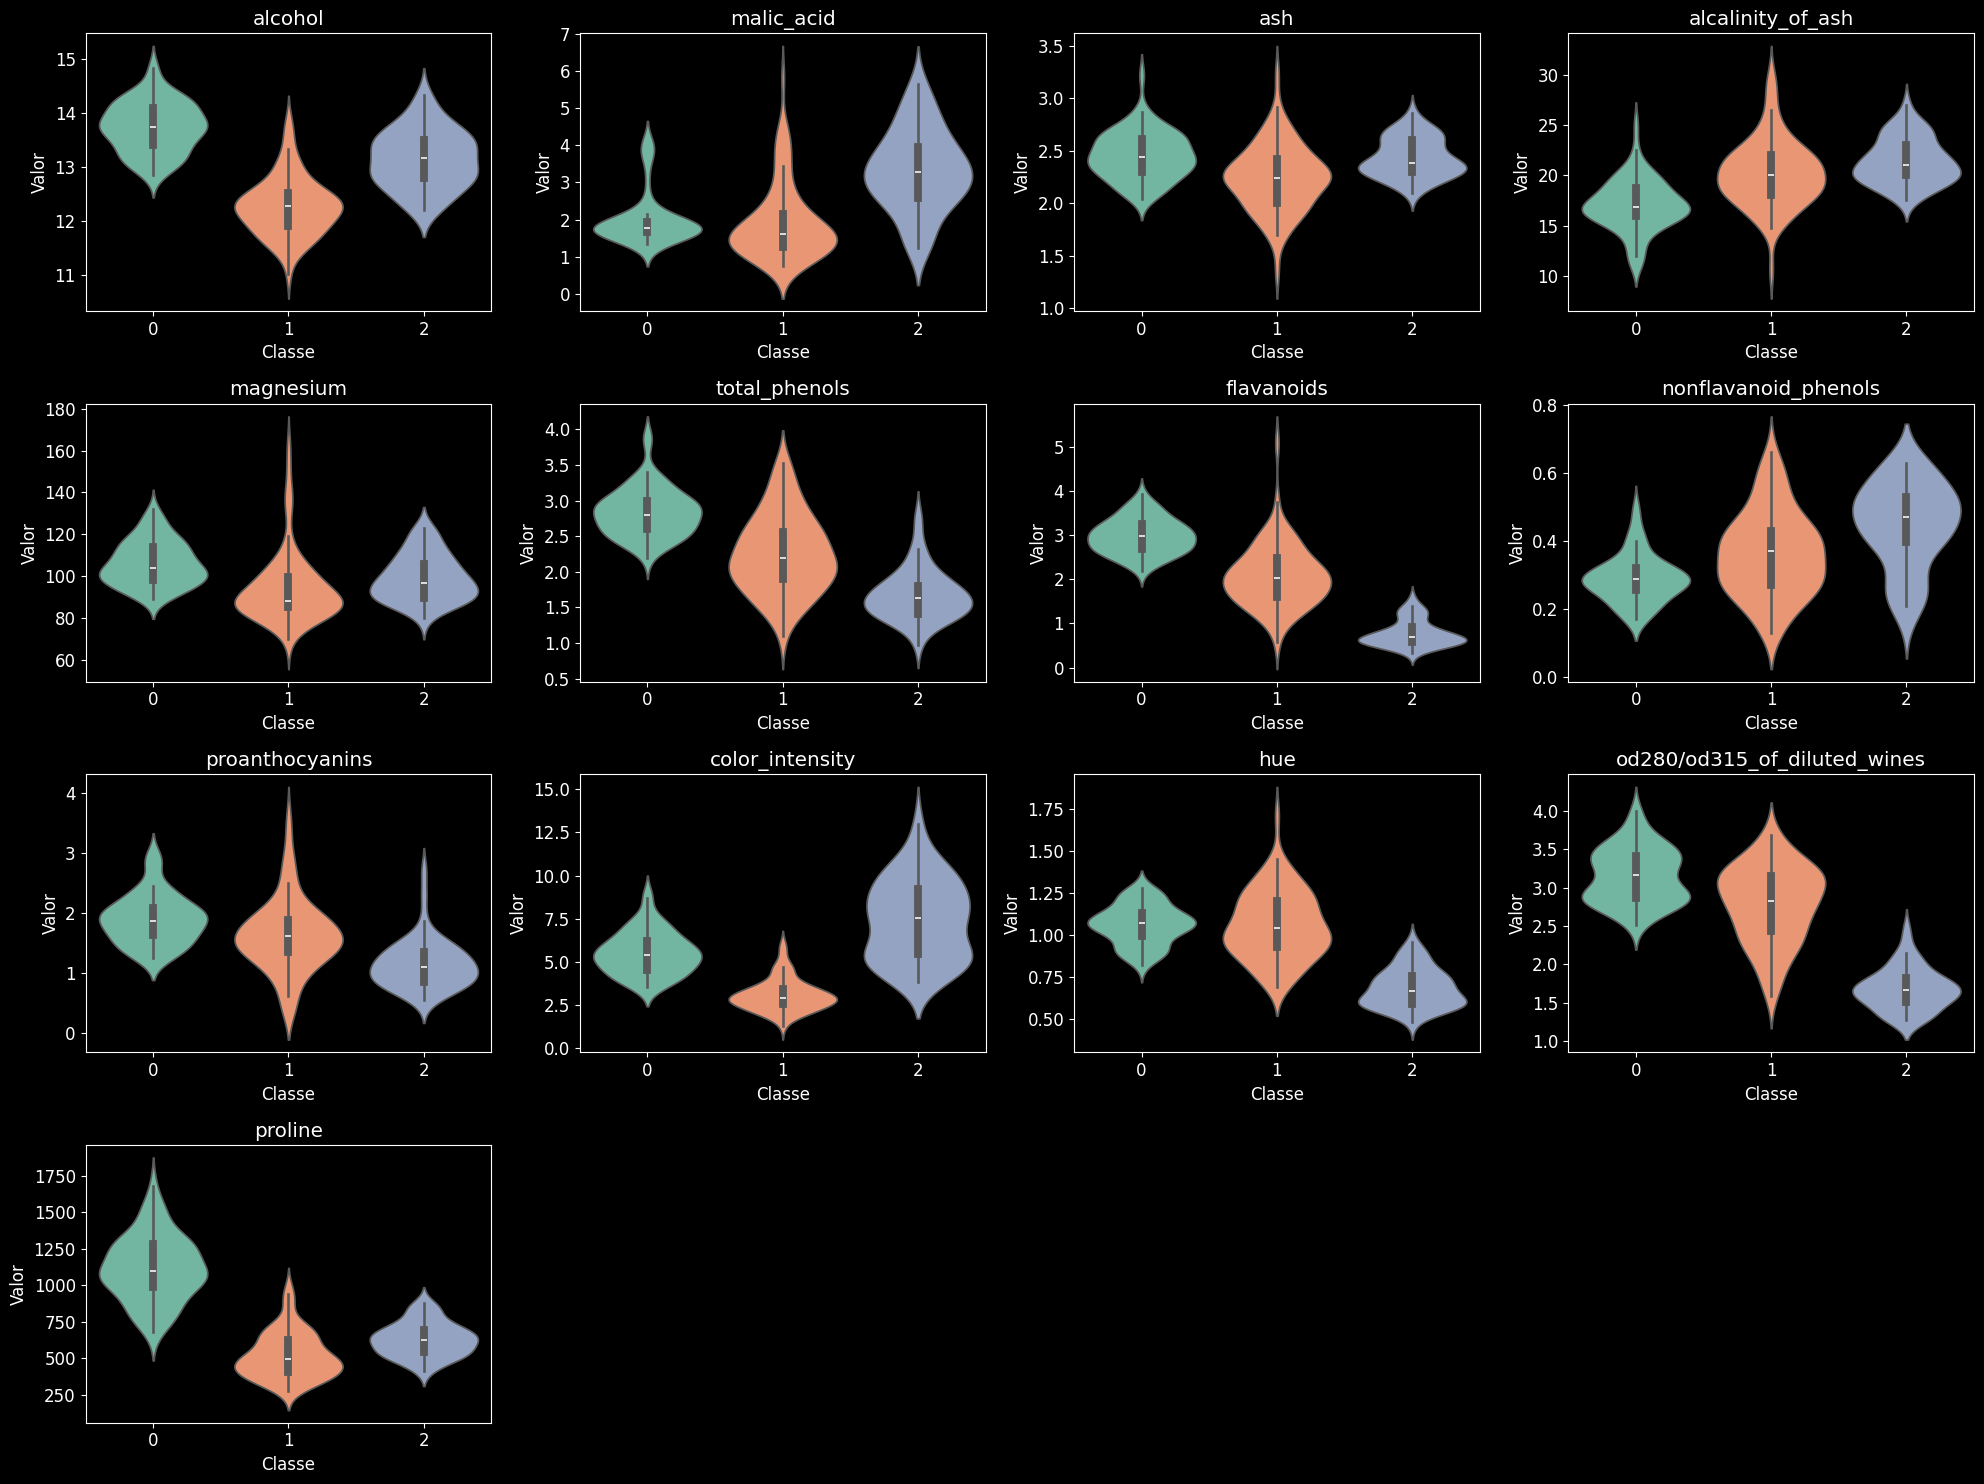

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

wine_raw = load_wine()
wine = pd.DataFrame(
    data = wine_raw.data,
    columns = wine_raw.feature_names
)
wine['target'] = wine_raw.target


features = wine_raw.feature_names

n_features = len(features)
ncols = 4
nrows = (n_features + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.violinplot(
        x='target',
        y=feature,
        hue='target',
        data=wine,
        ax=axes[i],
        inner="box",
        palette="Set2",
        legend=False
    )
    axes[i].set_title(feature)
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel("Valor")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Vamos executar um boxplot para comparação.

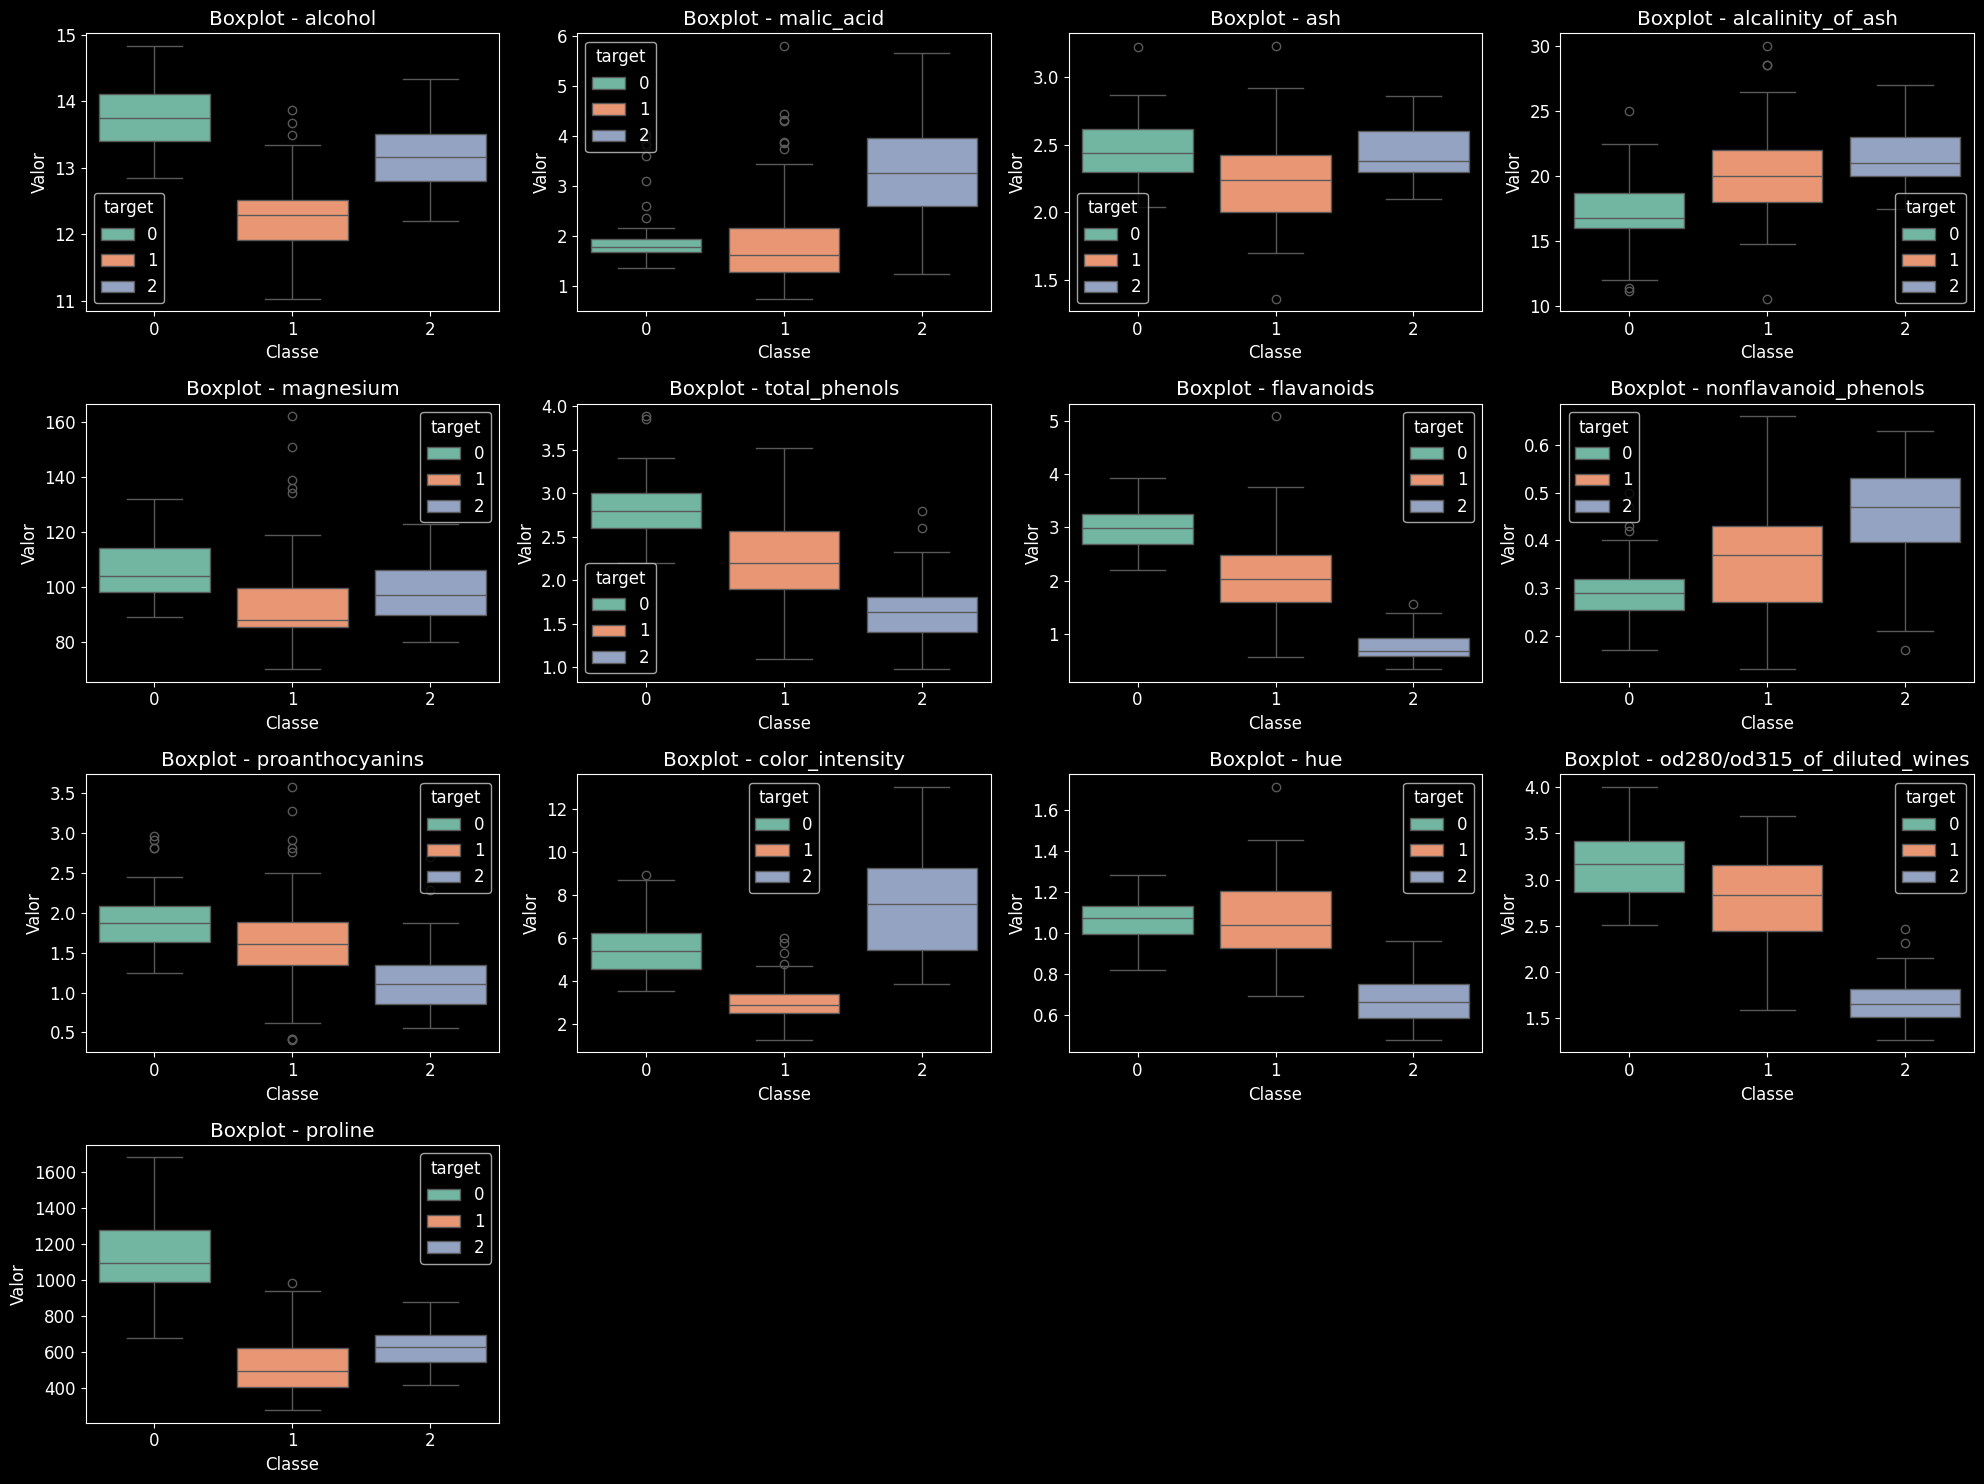

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

# Carregar dataset Wine
wine_raw = load_wine()
wine = pd.DataFrame(
    data=wine_raw.data,
    columns=wine_raw.feature_names
)
wine['target'] = wine_raw.target

# Configurações
features = wine_raw.feature_names
n_features = len(features)
ncols = 4
nrows = (n_features + ncols - 1) // ncols

# Criar subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
axes = axes.flatten()

# Gerar boxplot para cada atributo
for i, feature in enumerate(features):
    sns.boxplot(
        x='target',
        y=feature,
        hue='target',
        data=wine,
        ax=axes[i],
        palette="Set2"
    )
    axes[i].set_title(f"Boxplot - {feature}")
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel("Valor")

# Remover eixos não usados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Aparentemente, **flavanoids e color intensity** tem boa segmentação para ser combinados e apresentarem áreas de distinção e separação limpa no hiperplano. No entanto, para manter o testes coesos, vamos executar os previamente estabelecidos com os parâmetros já escolhidos anteriormente (alcool x ácido málico e alcool x flavanoids).

Preparação do Dataset
--

Como vamos considerar apenas as features (atributos preditores), excluindo a variável de classe. Isso vai permitir analisar estatisticamente os atributos preditores, avaliar a distribuição dos dados, detectar escalas diferentes e decidir se há necessidade de normalizar / padronizar os dados.




In [ ]:
# Droping the target since we only need the measurements
X = wine.drop(columns = ['target'], axis=1)
X.describe(include = 'all')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Os dados apresentados estão com grande variação (ex: alcool 11 a 15, color intensity 1.28 a 13, proline 278 a 1680). Isso dificulta a escolha dos parâmetros, além de obrigar a normalização.

No entanto, conforme discutido anteriormente, manteremos a continuidade das variáveis escolhidas no começo, mas já está mais claro que não foram as melhores escolhas. Abaixo será normalizado os parâmetros (alcool flavonoids) para matriz 2d.

In [ ]:
# converting into numpy array and assigning alcohol and flavanoids
X = X.to_numpy()[:, (0, 6)]  # 1rd and 7th columns
y = wine['target'].to_numpy().astype(int)

E depois separar o *dataset* nos conjuntos de treinamento ($70\%$) e teste ($30\%$). Novamente a `Scikit-learn` nos auxilia com a função `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')


Training: 124 instances 
Test: 54 instances

Training shape:(124, 2) 
First row:[13.49  0.48]

Test shape:(54, 2) 
First row:[13.64  3.03]

Labels 
	training: 124 instances 
	test: 54 instances

Labels training shape:(124,) 
set:[2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1
 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2
 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2
 1 1 1 1 1 1 2 0 1 1 0 1 1]

Labels test shape:(54,) 
set:[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2]


Treinamento do Perceptron
--


In [ ]:
lr = 1e-3  # 0.001
epochs = 100

perceptron = Perceptron(lr, epochs)

perceptron.fit(X_train, y_train)


(array([ 1.51611, -6.08702]), np.float64(0.32500000000000023))

Predição e Avaliação
--


In [ ]:
pred = perceptron.predict(X_test)

Qual foi a acurácia?

Accuracy:0.41

[[ 2 17  0]
 [ 1 20  0]
 [ 0 14  0]]


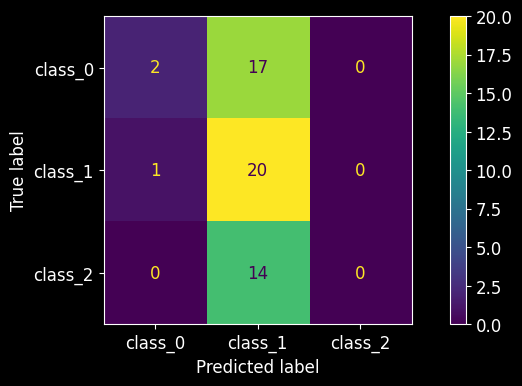

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

class_names = ['class_0', 'class_1', 'class_2']  # For the confusion matrix

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

ConfusionMatrixDisplay(cm, display_labels=class_names).plot()

plt.show()

41%.

**Ruim** para esse *dataset*.

Bem, podemos usar a estratégia de tentar ajustar os hiperparâmetros (**hyperparameter tuning**). Por exemplo, aumentar a taxa de aprendizado (*learning rating* ou *epochs*) para digamos 1000.

Accuracy:0.39

[[ 2 17  0]
 [ 2 19  0]
 [ 0 14  0]]


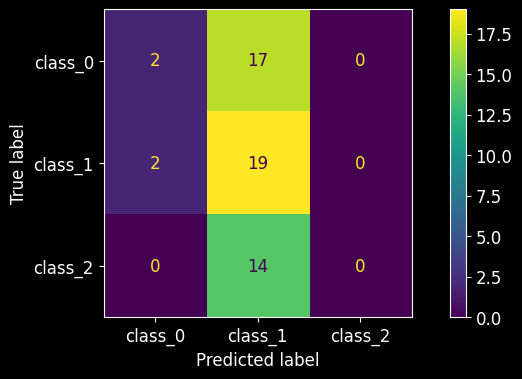

In [ ]:
lr = 1e-3  # 0.001
epochs = 1000

perceptron = Perceptron(lr, epochs)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

ConfusionMatrixDisplay(cm, display_labels=class_names).plot()

plt.show()

<font color="#ff0000">**Piorou kkkkk!**</font> Outra estratégia é **normalizar** as entradas. Já tínhamos discutido isso como necessário, então, vamos em frente.




In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')

Training: 124 instances 
Test: 54 instances

Training shape:(124, 2) 
First row:[ 0.62844732 -1.51706225]

Test shape:(54, 2) 
First row:[0.80742634 1.01578048]

Labels 
	training: 124 instances 
	test: 54 instances

Labels training shape:(124,) 
set:[2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1
 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2
 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2
 1 1 1 1 1 1 2 0 1 1 0 1 1]

Labels test shape:(54,) 
set:[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2]


Accuracy:0.63

[[15  4  0]
 [ 2 19  0]
 [ 0 14  0]]


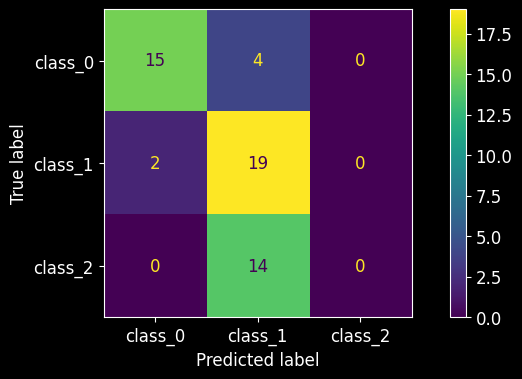

In [ ]:
lr = 1e-3  # 0.001
epochs = 100

perceptron = Perceptron(lr, epochs)

perceptron.fit(X_train, y_train)

pred = perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

ConfusionMatrixDisplay(cm, display_labels=class_names).plot()

plt.show()

Isn't good! 🥳

<font color="#ff0000">Uma taxa de $63\%$ já é **razoável**</font>.

Mas **errou todas as instâncias de uma classe**! 😭

In [ ]:
from sklearn import metrics

#print("Precision, Recall, Confusion matrix, in testing\n")

# Precision Recall scores
#print(metrics.classification_report(y_test, pred, digits=2))

# Confusion matrix
#print(metrics.confusion_matrix(y_test, pred))

Vamos tentar entender como a decisão foi tomada.

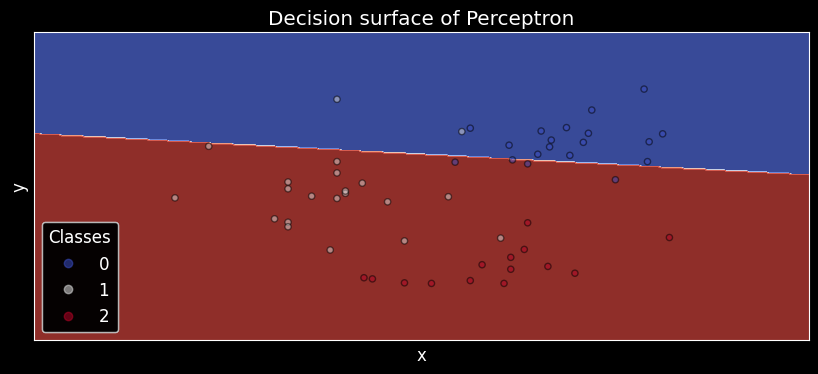

In [ ]:
def make_meshgrid(x, y, h=.02):
    """
    Generate a meshgrid of points based on input data x, y.

    Parameters
    ----------
    x : array-like
        Input data for x-axis.
    y : array-like
        Input data for y-axis.
    h : float, optional
        Step size for the meshgrid. Default is 0.02.

    Returns
    -------
    xx : ndarray
         Meshgrid array for x-axis.
    yy : ndarray
         Meshgrid array for y-axis.
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """
    Plot the decision boundaries of a classifier as contours on a 2D plot.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes on which to draw the contours.
    clf : sklearn.base.ClassifierMixin
        The classifier to use for predicting the class labels.
    xx : numpy.ndarray
        The x-coordinates of the points on the plot.
    yy : numpy.ndarray
        The y-coordinates of the points on the plot.
    **params : dict
        Additional parameters to pass to the `contourf()` function of the
        `matplotlib.axes.Axes` object.

    Returns
    -------
    out : matplotlib.contour.QuadContourSet
        The `QuadContourSet` object returned by the `contourf()` function.
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    out = ax.contourf(xx, yy, Z, **params)

    return out

fig, ax = plt.subplots()

title = 'Decision surface of Perceptron'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, perceptron, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

scatter = ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha = 0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)


plt.show()

E como se comporta a implementação da ``Scikit-learn``?

Accuracy:0.91

[[18  1  0]
 [ 1 17  3]
 [ 0  0 14]]


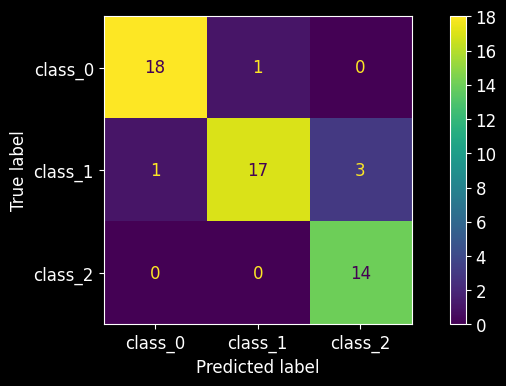

In [ ]:
from sklearn.linear_model import Perceptron

sk_perceptron = Perceptron()
sk_perceptron.fit(X_train, y_train)
sk_perceptron_pred = sk_perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(sk_perceptron_pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = metrics.confusion_matrix(y_test, sk_perceptron_pred)
print(cm)

ConfusionMatrixDisplay(cm, display_labels=class_names).plot()

plt.show()

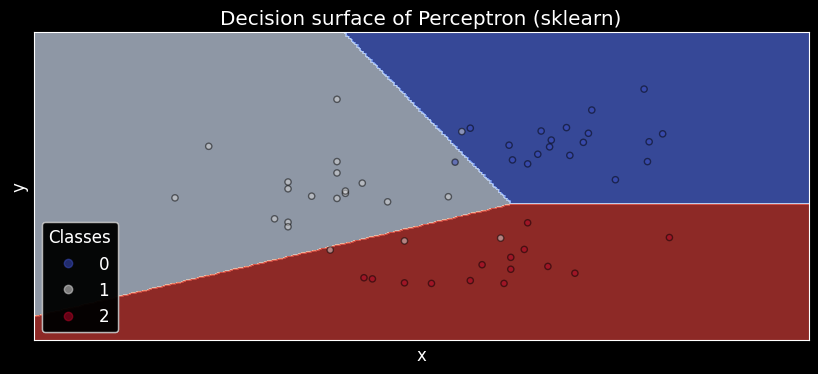

In [ ]:
fig, ax = plt.subplots()

title = 'Decision surface of Perceptron (sklearn)'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sk_perceptron, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

scatter = ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

<font color="#ff0000">Conseguiu $91\%$!</font>

**E melhor desempenho entre as classes!** 🤔

E, só para finalizar, vejamos o desempenho de outro modelo mais complexo, como um **SVM**.

Accuracy using SVM, RBF kernel: 0.93

[[19  0  0]
 [ 1 18  2]
 [ 0  1 13]]


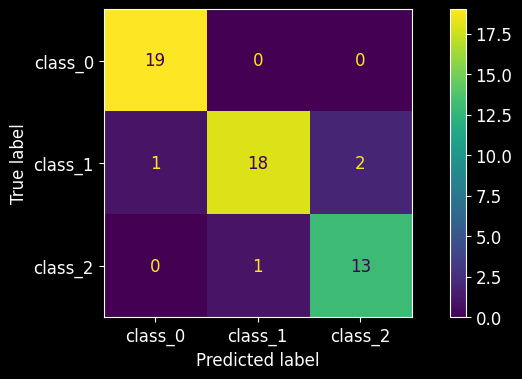

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy using SVM, RBF kernel: {acc:.2f}\n')

# Confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.show()

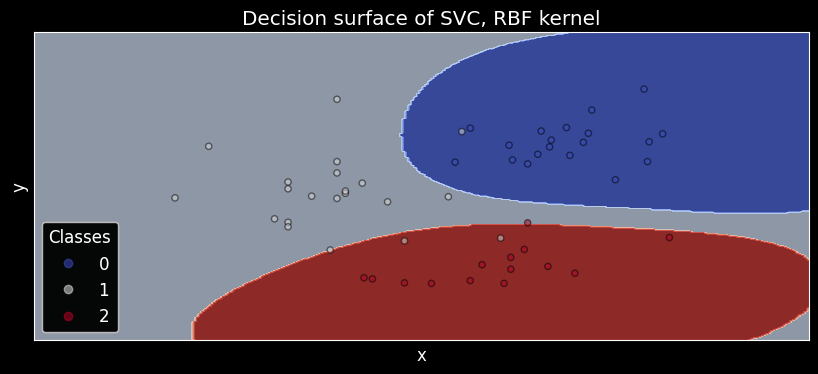

In [ ]:
fig, ax = plt.subplots()


title = 'Decision surface of SVC, RBF kernel'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)

ax.set_ylabel('y')
ax.set_xlabel('x')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

Resultado até aqui 93%.

---
---


Poderíamos dar por encerrado aqui, temos um valor de acurácia bastante alto, mas vamos continuar, tentando adicionar agora os valores previamente entendidos como mais adequados.


Agora vamos fazer o processo com as variáveis decididas anteriormente (flavonoids e color intensity).

# Flavanoids e Color Intensity

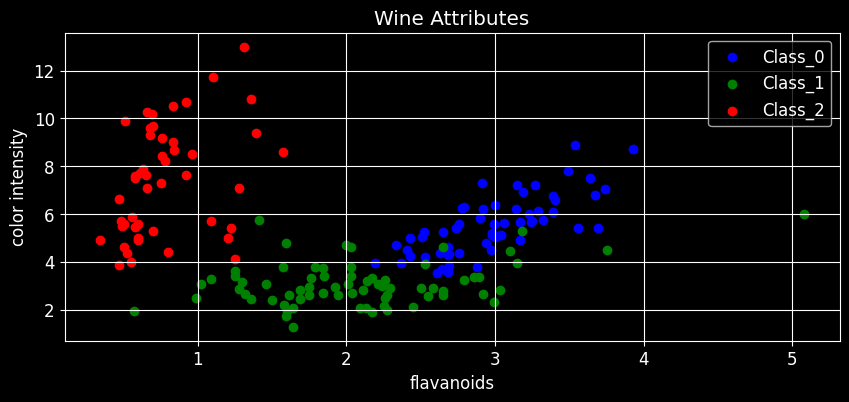

In [ ]:
classes = []

for i in range(len(wine['target'])):
    if wine['target'][i] == 0:
        classes.append('class_0')
    elif wine['target'][i] == 1:
        classes.append('class_1')
    else:
        classes.append('class_2')


wine['classes'] = classes

class_0 = wine[wine.classes == "class_0"]
class_1 = wine[wine.classes == 'class_1']
class_2 = wine[wine.classes == 'class_2']

fig, ax = plt.subplots()

# labels and scatter points
ax.scatter(class_0['flavanoids'], class_0['color_intensity'], label="Class_0", facecolor="blue")
ax.scatter(class_1['flavanoids'], class_1['color_intensity'], label="Class_1", facecolor="green")
ax.scatter(class_2['flavanoids'], class_2['color_intensity'], label="Class_2", facecolor="red")


ax.set_xlabel("flavanoids")
ax.set_ylabel("color intensity")
ax.grid()
ax.set_title("Wine Attributes")
ax.legend()

plt.show();

Refazendo os conjuntos de parâmetros para **flavanoids** e **color intensity**.

In [ ]:
# converting into numpy array and assigning flavanoids / color intensity
# The wine DataFrame was created earlier and contains the original data.
# We select the 'flavanoids' and 'color_intensity' columns from the DataFrame.
X = wine[['flavanoids', 'color_intensity']].to_numpy()

# We also get the target variable from the wine DataFrame.
y = wine['target'].to_numpy().astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training: {len(X_train)} instances \nTest: {len(X_test)} instances')

print(f'\nTraining shape:{X_train.shape} \nFirst row:{X_train[0]}')
print(f'\nTest shape:{X_test.shape} \nFirst row:{X_test[0]}')

print(f'\nLabels \n\ttraining: {len(y_train)} instances \n\ttest: {len(y_test)} instances')
print(f'\nLabels training shape:{y_train.shape} \nset:{y_train}')
print(f'\nLabels test shape:{y_test.shape} \nset:{y_test}')

Training: 124 instances 
Test: 54 instances

Training shape:(124, 2) 
First row:[0.48 5.7 ]

Test shape:(54, 2) 
First row:[3.03 5.1 ]

Labels 
	training: 124 instances 
	test: 54 instances

Labels training shape:(124,) 
set:[2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1
 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2
 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2
 1 1 1 1 1 1 2 0 1 1 0 1 1]

Labels test shape:(54,) 
set:[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2]


# Treinamento Perceptron

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
pred = model.predict(X_test)

Accuracy:0.91

[[17  2  0]
 [ 3 18  0]
 [ 0  0 14]]


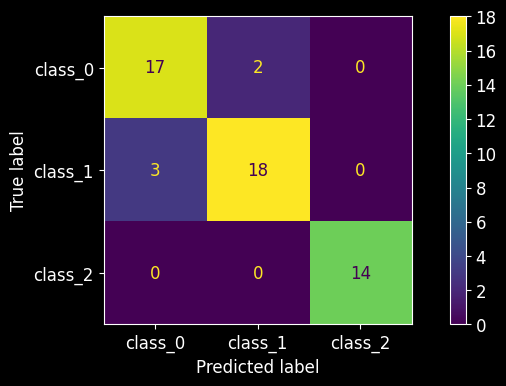

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

class_names = ['class_0', 'class_1', 'class_2']  # For the confusion matrix

# Accuracy
acc = accuracy_score(pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

ConfusionMatrixDisplay(cm, display_labels=class_names).plot()

plt.show()

Já é muito bom!

Accuracy:0.87

[[19  0  0]
 [ 7 14  0]
 [ 0  0 14]]


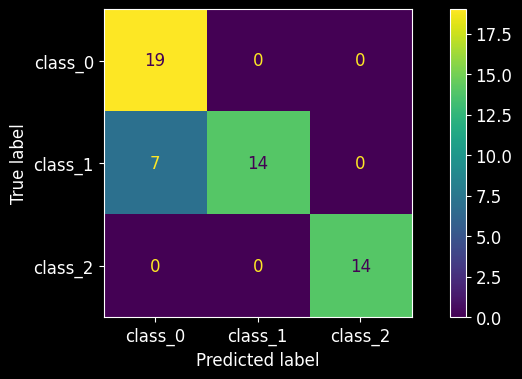

In [ ]:
from sklearn.linear_model import Perceptron

sk_perceptron = Perceptron()
sk_perceptron.fit(X_train, y_train)
sk_perceptron_pred = sk_perceptron.predict(X_test)

# Accuracy
acc = accuracy_score(sk_perceptron_pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = metrics.confusion_matrix(y_test, sk_perceptron_pred)
print(cm)

ConfusionMatrixDisplay(cm, display_labels=class_names).plot()

plt.show()

Ficou pior... Manter SVC.

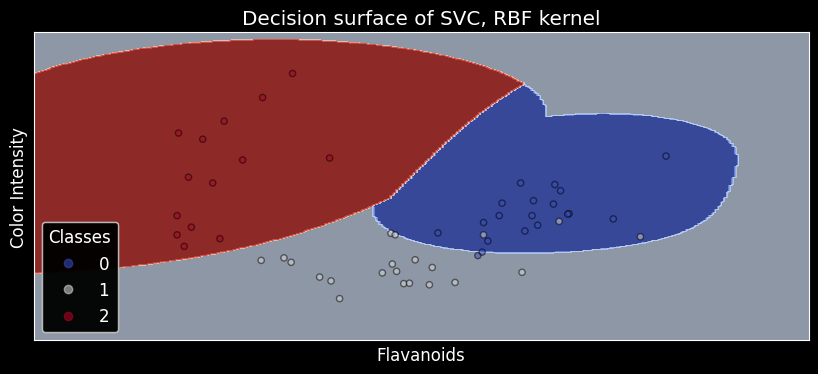

In [ ]:
fig, ax = plt.subplots()


title = 'Decision surface of SVC, RBF kernel'

# Set-up grid for plotting

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.5)

ax.set_ylabel('Color Intensity')
ax.set_xlabel('Flavanoids')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

# Conclusão:

Ficaremos com o primeiro teste (**alcool x flavanoids**) porque teve índice de **93% de acerto**.

*Les carottes sont cuites!* 🥕🥕🥕